In [218]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score

In [219]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.9 * X**2 + 0.3 * X + 2 + np.random.randn(200, 1)

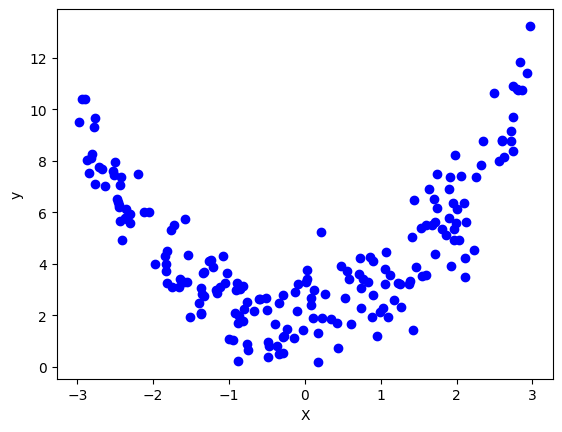

In [220]:
plt.scatter(X, y,color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# ✅ Evaluate linear model
print("R2 score (Linear):", r2_score(y_test, y_pred))

R2 score (Linear): -0.022150447629839753


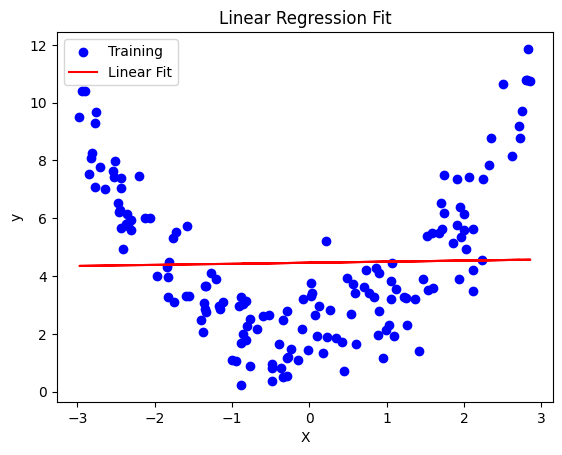

In [223]:
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.plot(X_train,lr.predict(X_train),color='red',label='Linear Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [224]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [225]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)


poly_lr = LinearRegression()
poly_lr.fit(X_train_scaled_poly, y_train)
y_poly_pred = poly_lr.predict(X_test_scaled_poly)

print("R2 score (Polynomial):", r2_score(y_test, y_poly_pred))

R2 score (Polynomial): 0.4005904675919574


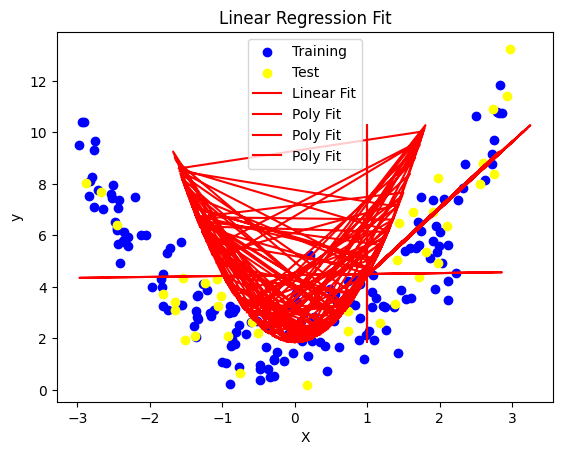

In [226]:
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='yellow', label='Test')
plt.plot(X_train,lr.predict(X_train),color='red',label='Linear Fit')
plt.plot(X_train_scaled_poly,poly_lr.predict(X_train_scaled_poly),color='red',label='Poly Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [227]:
X_range = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)
y_range_poly_pred = poly_lr.predict(X_range_poly)

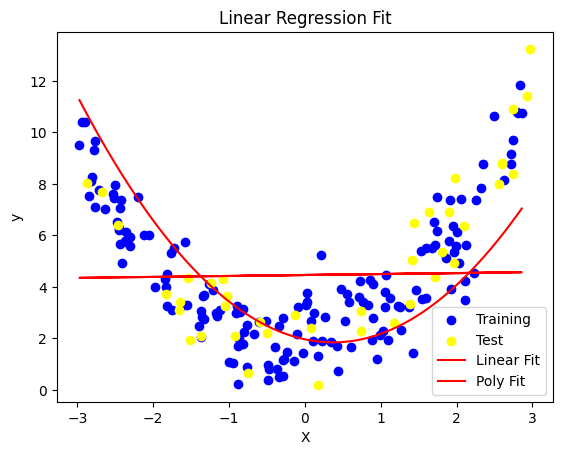

In [228]:
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='yellow', label='Test')
plt.plot(X_train,lr.predict(X_train),color='red',label='Linear Fit')
plt.plot(X_range,poly_lr.predict(X_range_poly),color='red',label='Poly Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()